<a href="https://colab.research.google.com/github/chandan9t8/StrengthOfConcrete/blob/main/CCS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pathlib import Path
import urllib.request
import zipfile
import pandas as pd

def load_concrete_data():
  data_path = Path("datasets/concrete.zip")
  if not data_path.is_file():
    Path("datasets").mkdir(parents=True, exist_ok=True)
    url = "https://archive.ics.uci.edu/static/public/165/concrete+compressive+strength.zip"
    urllib.request.urlretrieve(url, data_path)
    with zipfile.ZipFile(data_path, 'r') as zip_ref:
      zip_ref.extractall(path="datasets")

  xls_path = Path("datasets/Concrete_Data.xls")
  return pd.read_excel(xls_path)

In [ ]:
concrete_data = load_concrete_data()

In [ ]:
concrete_data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [ ]:
concrete_data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [ ]:
concrete_data.rename(columns = {'Cement (component 1)(kg in a m^3 mixture)': 'cement',
                           'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'blast_furnace_slag',
                           'Fly Ash (component 3)(kg in a m^3 mixture)':'fly_ash',
                           'Water  (component 4)(kg in a m^3 mixture)':'water',
                           'Superplasticizer (component 5)(kg in a m^3 mixture)': 'superplasticizer',
                           'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'coarse_aggregate',
                           'Fine Aggregate (component 7)(kg in a m^3 mixture)': 'fine_aggregate',
                           'Age (day)': 'days',
                           'Concrete compressive strength(MPa, megapascals) ': 'ccs'},
                inplace = True)

concrete_data.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate', 'days', 'ccs'],
      dtype='object')

In [ ]:
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cement              1030 non-null   float64
 1   blast_furnace_slag  1030 non-null   float64
 2   fly_ash             1030 non-null   float64
 3   water               1030 non-null   float64
 4   superplasticizer    1030 non-null   float64
 5   coarse_aggregate    1030 non-null   float64
 6   fine_aggregate      1030 non-null   float64
 7   days                1030 non-null   int64  
 8   ccs                 1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


we don't have any null values, in any columns.

In [ ]:
concrete_data.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,days,ccs
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


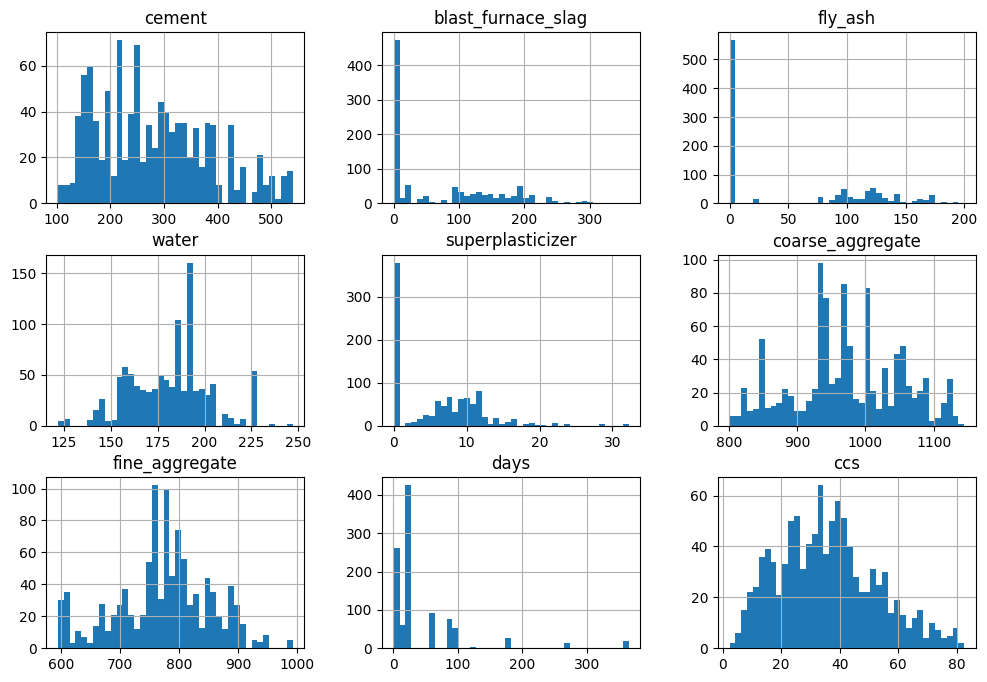

In [ ]:
import matplotlib.pyplot as plt

concrete_data.hist(bins=40, figsize=(12,8))
plt.show()

Some initial insights :
- The usage of materials such as `blast_furnace_slag`, `fly_ash`, `superplasticizer` appears to be low since they are mostly skewed towards zero
- `water`, `cement` and aggregates(`coarse_aggregate` and `fine_aggregate`) are primary components in the dataset as they have the almost normal shaped distributions.
- Most of the values taken were before 100 days
- The histograms for the features such as `blast_furnace_slag`, `fly_ash`, `superplasticizer` and `days` is right-skewed making it hard for ML algorithms to detect underlying patterns. We need to transform them.

Since the dataset, we have is small, we use stratified sampling. This makes sure that no sampling bias introduced.

For our data, `cement` seems to be a important feature with its distribution spanning a wider range, indicating its importance in various mixtures. Hence we make categories in that feature.

In [ ]:
import numpy as np
concrete_data["cement_cat"] = pd.cut(concrete_data["cement"],
                                 bins=[100., 200., 300., 400., 500., np.inf],
                                       labels=[1, 2, 3, 4, 5])

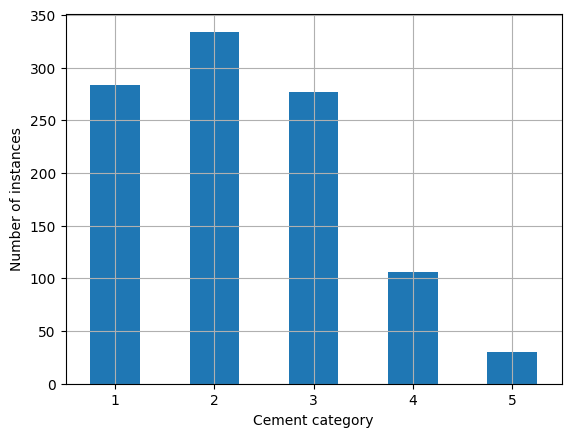

In [ ]:
concrete_data["cement_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Cement category")
plt.ylabel("Number of instances")
plt.show()

In [ ]:
concrete_data["cement_cat"].value_counts() / len(concrete_data)

,count
cement_cat,
2,0.324272
1,0.274757
3,0.268932
4,0.102913
5,0.029126


In [ ]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

strat_train_set, strat_test_set = train_test_split(concrete_data, test_size=0.2, stratify=concrete_data["cement_cat"], random_state=42)

In [ ]:
strat_test_set["cement_cat"].value_counts() / len(strat_test_set)

,count
cement_cat,
2,0.325243
1,0.276699
3,0.266990
4,0.101942
5,0.029126


In [ ]:
#drop the "cement_cat" column as we dont need it further

for set_ in (strat_train_set, strat_test_set):
  set_.drop("cement_cat", axis=1, inplace=True)

In [ ]:
concrete_data = strat_train_set.copy()

# Exploration and Visualisation

In [ ]:
#looking for correlation

corr_matrix = concrete_data.corr()
corr_matrix["ccs"].sort_values(ascending = False)

,ccs
ccs,1.000000
cement,0.507141
superplasticizer,0.359449
days,0.334526
blast_furnace_slag,0.122696
fly_ash,-0.119635
fine_aggregate,-0.124362
coarse_aggregate,-0.186137
water,-0.290981


The features `cement`, `superplasticizer` and `days` have a reasonably good positive correlation with concrete compressive strength.

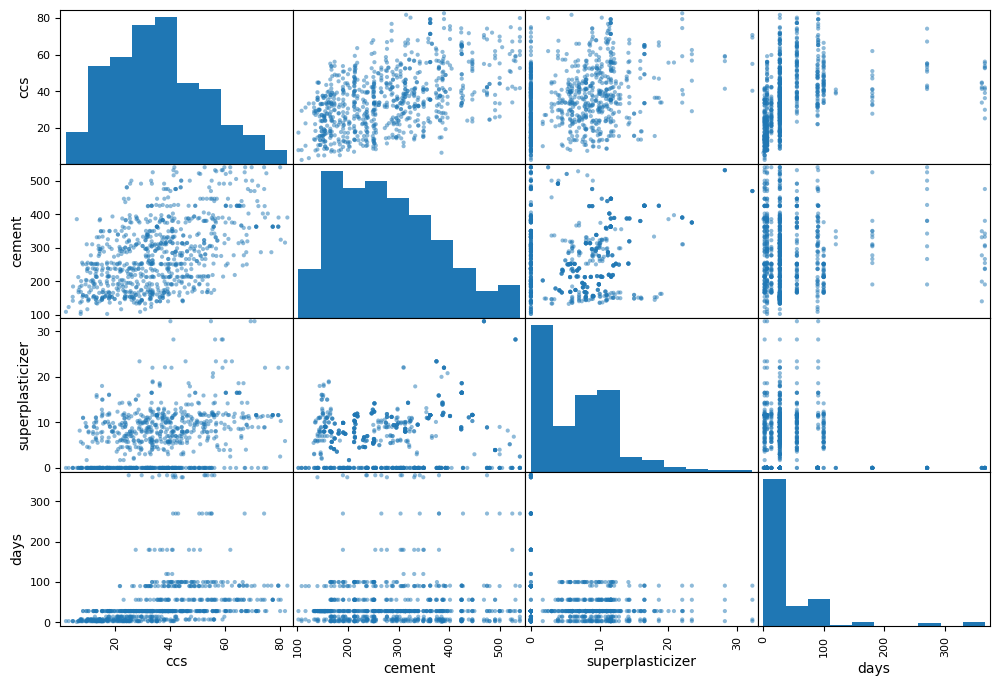

In [ ]:
#plotting the promising features against each other
from pandas.plotting import scatter_matrix

attributes = ["ccs", 'cement', 'superplasticizer', 'days']
scatter_matrix(concrete_data[attributes], figsize=(12,8))
plt.show()

`ccs` seems to  have a strong correlation with `cement`, although the points are more scattered(might be due to data set size).

<Axes: xlabel='cement', ylabel='ccs'>

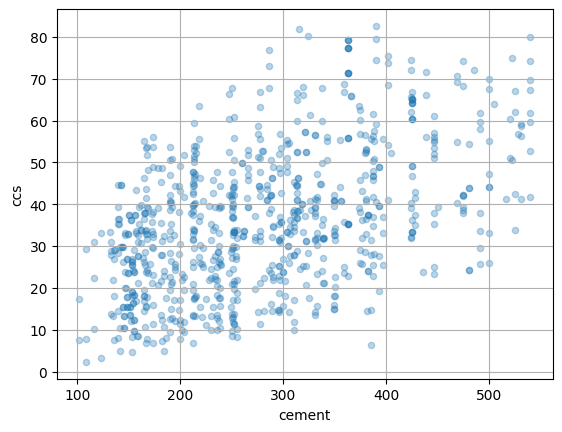

In [ ]:
#zooming into most promising feature

concrete_data.plot(kind="scatter", x = "cement", y = "ccs", alpha=0.3, grid=True)

We can see that there is clear upward trend although the points are dispersed. Collecting more data would help but right now we work with what we have.

# experimenting with attribute combinations

A bit of googling revealed some interesting and potentialy promising attribute combinations to try:

- water-to-cement ratio
- total cementious materials to water ratio : $\frac{(\text{cement + blast furnace slag + fly ash})}{\text{water}}$
- superplasticizer-to-cement ratio with age : $\frac{\text{superplasticizer}}{\text{cement}} * \text{Age}$
- aggregate-to-cementious materials ratio : $\frac{(\text{Coarse Aggregate + Fine Aggregate})}{(\text{Cement + Blast Furnace Slag + Fly Ash})}$

In [ ]:
concrete_data["water_cement_ratio"] = concrete_data["water"] / concrete_data["cement"]
concrete_data["cementious_water_ratio"] = (concrete_data["cement"] + concrete_data["blast_furnace_slag"] + concrete_data["fly_ash"]) / concrete_data["water"]
concrete_data["superplasticizer_cement_ratio"] = (concrete_data["superplasticizer"] / concrete_data["cement"]) * concrete_data["days"]
concrete_data["aggregate_to_cement_ratio"] = (concrete_data["coarse_aggregate"] + concrete_data["fine_aggregate"]) / (concrete_data["cement"]+concrete_data["blast_furnace_slag"]+concrete_data["fly_ash"])


In [ ]:
# constructing a correlation matrix
corr_matrix = concrete_data.corr(numeric_only=True)
corr_matrix["ccs"].sort_values(ascending=False)

,ccs
ccs,1.000000
cementious_water_ratio,0.628923
cement,0.507141
superplasticizer_cement_ratio,0.375480
superplasticizer,0.359449
days,0.334526
blast_furnace_slag,0.122696
fly_ash,-0.119635
fine_aggregate,-0.124362
coarse_aggregate,-0.186137


The attribute combinations reveal interesting trends
- `cementious_water_ratio` is more correlated to target compared to just `cement`. Likewise `superplasticizer_cement_ratio` is more correlated compared to just `superplasticizer`.
- `water_cement_ratio` and `aggregate_to_cement_ratio` has a comparable negative correlation. More the water content in the mixture, lesser is the strength. Similarly more is the aggregate mixture compared to cementious mixture, weaker the mixture.

# Preparing data for ML algorithms

In [ ]:
#revert to clean training data
concrete_data = strat_train_set.drop("ccs", axis=1)
concrete_labels = strat_train_set["ccs"].copy()

In [ ]:
#use imputer to fill in the missing values(in the future)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
X = imputer.fit_transform(concrete_data)     #returns a numpy array
concrete_transformed = pd.DataFrame(X, columns=concrete_data.columns, index=concrete_data.index)   #convert back to dataframe

In [ ]:
imputer.statistics_

array([266.  ,  22.  ,   0.  , 185.  ,   6.47, 967.24, 779.32,  28.  ])

In [ ]:
#Standardization(less affected by outliers)

from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
concrete_scaled = pd.DataFrame(std_scaler.fit_transform(concrete_data))

Some of the features are heavy tailed, lets try log transformation

### Dealing with skewed data

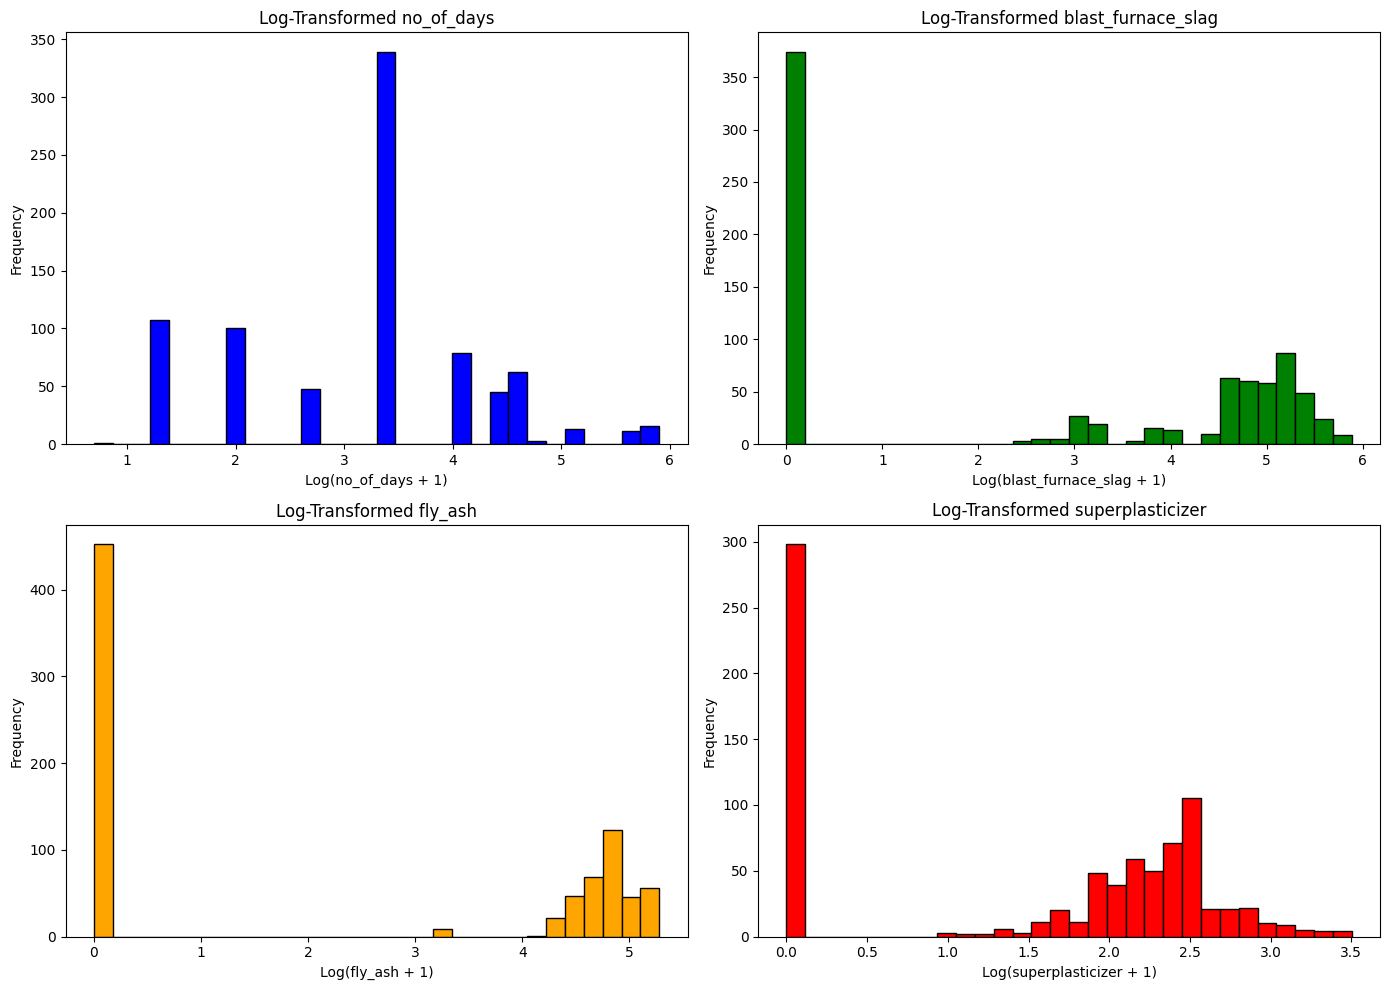

In [ ]:
import numpy as np
no_of_days_log = np.log1p(concrete_data["days"])
blast_furnace_slag_log = np.log1p(concrete_data["blast_furnace_slag"])
fly_ash_log = np.log1p(concrete_data["fly_ash"])
superplasticizer_log = np.log1p(concrete_data["superplasticizer"])

# Create subplots: 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plotting the histograms
axes[0, 0].hist(no_of_days_log, bins=30, edgecolor='black', color='blue')
axes[0, 0].set_title('Log-Transformed no_of_days')
axes[0, 0].set_xlabel('Log(no_of_days + 1)')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(blast_furnace_slag_log, bins=30, edgecolor='black', color='green')
axes[0, 1].set_title('Log-Transformed blast_furnace_slag')
axes[0, 1].set_xlabel('Log(blast_furnace_slag + 1)')
axes[0, 1].set_ylabel('Frequency')

axes[1, 0].hist(fly_ash_log, bins=30, edgecolor='black', color='orange')
axes[1, 0].set_title('Log-Transformed fly_ash')
axes[1, 0].set_xlabel('Log(fly_ash + 1)')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(superplasticizer_log, bins=30, edgecolor='black', color='red')
axes[1, 1].set_title('Log-Transformed superplasticizer')
axes[1, 1].set_xlabel('Log(superplasticizer + 1)')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

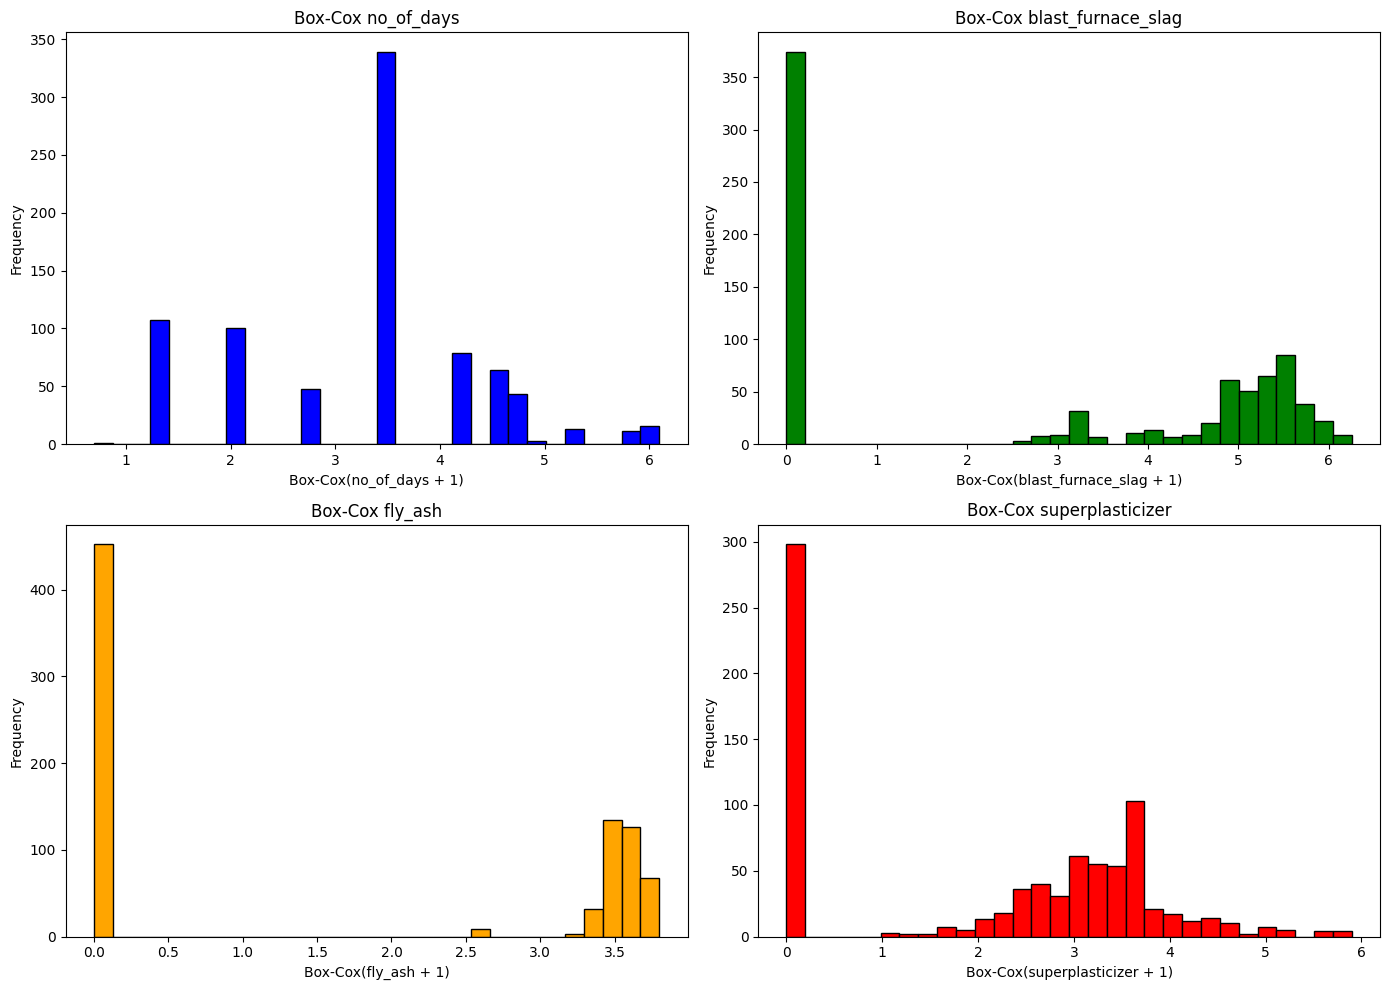

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt

# Box-Cox transformations
no_of_days_boxcox, _ = stats.boxcox(concrete_data['days'] + 1)
blast_furnace_slag_boxcox, _ = stats.boxcox(concrete_data['blast_furnace_slag'] + 1)
fly_ash_boxcox, _ = stats.boxcox(concrete_data['fly_ash'] + 1)
superplasticizer_boxcox, _ = stats.boxcox(concrete_data['superplasticizer'] + 1)

# Create subplots: 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plotting the histograms for Box-Cox transformed data
axes[0, 0].hist(no_of_days_boxcox, bins=30, edgecolor='black', color='blue')
axes[0, 0].set_title('Box-Cox no_of_days')
axes[0, 0].set_xlabel('Box-Cox(no_of_days + 1)')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(blast_furnace_slag_boxcox, bins=30, edgecolor='black', color='green')
axes[0, 1].set_title('Box-Cox blast_furnace_slag')
axes[0, 1].set_xlabel('Box-Cox(blast_furnace_slag + 1)')
axes[0, 1].set_ylabel('Frequency')

axes[1, 0].hist(fly_ash_boxcox, bins=30, edgecolor='black', color='orange')
axes[1, 0].set_title('Box-Cox fly_ash')
axes[1, 0].set_xlabel('Box-Cox(fly_ash + 1)')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(superplasticizer_boxcox, bins=30, edgecolor='black', color='red')
axes[1, 1].set_title('Box-Cox superplasticizer')
axes[1, 1].set_xlabel('Box-Cox(superplasticizer + 1)')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

for the feature `days`, log transformer or boxcox seem to transform it to a normal distribution.

In [ ]:
concrete_data["superplasticizer"].value_counts()

,count
superplasticizer,
0.00,298
8.00,21
11.60,20
7.00,16
6.00,16
...,...
18.80,1
11.70,1
2.00,1


In [ ]:
concrete_data["blast_furnace_slag"].value_counts()

,count
blast_furnace_slag,
0.0,369
189.0,29
106.3,18
20.0,12
24.0,12
...,...
178.0,1
97.0,1
238.2,1


In [ ]:
concrete_data["fly_ash"].value_counts()

,count
fly_ash,
0.00,452
118.27,14
94.00,13
79.00,12
141.00,10
...,...
89.60,1
91.00,1
150.40,1


Since the transformation that we are applying to other columns is not affecting their distribution much, forcing a transformation might not add a value. Tree models might be more suited for such type of data since the tree models are less sensitive to distribution of the features. They can handle skewed or non-normal data naturally, and as such, feeding the features as they are should not hurt model performance.

However the problem arises when we are using linear models. These models tend to perform better when the features are normally distributed because they assume a linear relationship between the features and the target variable. For these models, transforming skewed features can help improve the accuracy and interpretability of the model.

### Transformation pipeline

In [ ]:
#pipeline for each transformation

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

def cementious_water_ratio(X):
    return (X[:, [0]] + X[:, [1]] + X[:, [2]]) / X[:, [3]]  # cement, blast furnace slag, fly ash / water

def water_cement_ratio(X):
    return X[:, [1]] / X[:, [0]]  # water / cement

def aggregate_to_cement_ratio(X):
    return (X[:, [3]] + X[:, [4]]) / (X[:, [0]] + X[:, [1]] + X[:, [2]])  # coarse + fine aggregates / (cement + slags)

def ratio_name(function_transformer, feature_names_in):
  return [""]

# Pipelines for each transformation
cementious_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(cementious_water_ratio, feature_names_out = ratio_name),
    StandardScaler())

water_cement_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(water_cement_ratio, feature_names_out = ratio_name),
    StandardScaler())

aggregate_to_cement_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(aggregate_to_cement_ratio, feature_names_out = ratio_name),
    StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy = "median"),
    FunctionTransformer(np.log1p, feature_names_out = ratio_name),
    StandardScaler())

default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())

In [ ]:
preprocessing = ColumnTransformer([
    ("cementious_water_ratio", cementious_pipeline, ["cement", "blast_furnace_slag", "fly_ash", "water"]),

    ("water_cement_ratio", water_cement_pipeline, ["cement", "water"]),

    ("aggregate_to_cement_ratio", aggregate_to_cement_pipeline, ["cement", "blast_furnace_slag", "fly_ash", "coarse_aggregate", "fine_aggregate"]),
    ("log_pipeline", log_pipeline, ["days"])
], remainder=default_num_pipeline)

# Ensure concrete_data is a Pandas DataFrame
if not isinstance(concrete_data, pd.DataFrame):
    try:
        concrete_data = pd.DataFrame(concrete_data)
    except Exception as e:
        print(f"Error converting concrete_data to DataFrame: {e}")


concrete_prepared = preprocessing.fit_transform(concrete_data)

In [ ]:
pd.DataFrame(concrete_prepared)

,0,1,2,3,4
0,-0.987911,0.363334,-0.248445,1.777921,-1.047148
1,0.290909,-0.065366,0.153387,0.726775,0.871182
2,-0.998871,0.328606,0.770418,0.726775,-0.295775
3,1.414877,-1.046592,-1.455263,0.726775,0.348001
4,-0.508996,0.311395,0.294932,-1.059582,-1.047148
...,...,...,...,...,...
819,-0.884978,0.694938,0.642376,0.112019,-1.047148
820,-0.782216,0.073880,0.565342,-1.690160,-0.170244
821,-0.987911,0.017913,-0.248445,1.152355,-1.047148
822,-0.758290,-0.626411,0.633773,-1.690160,-1.047148


In [ ]:
preprocessing.get_feature_names_out()

array(['cementious_water_ratio__', 'water_cement_ratio__',
       'aggregate_to_cement_ratio__', 'log_pipeline__',
       'remainder__superplasticizer'], dtype=object)

# Selecting a model

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

regression_model = make_pipeline(preprocessing, LinearRegression())
regression_model.fit(concrete_data, concrete_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('cementious_water_ratio',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function rat...
                                                   'blast_furnace_slag',
                                                   'fly_ash',
                                                   'coarse_aggregate',
                                                   'fine_aggregate']),
                                                 ('log_pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x789bb8a75d80>,
                                                                                       func=<ufunc 'log1p'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['days'])])),
                ('linearregression', LinearRegression())])

In [ ]:
from sklearn.model_selection import cross_val_score

regression_rmses = -cross_val_score(regression_model, concrete_data, concrete_labels, scoring = "neg_root_mean_squared_error", cv = 10)
pd.Series(regression_rmses).describe()

,0
count,10.000000
mean,7.338465
std,0.778665
min,6.170361
25%,6.777701
50%,7.357189
75%,7.758106
max,8.612314


### Support Vector Regressor

In [ ]:
from sklearn.svm import SVR

sv_regressor = make_pipeline(preprocessing, SVR())
sv_rmses = -cross_val_score(sv_regressor, concrete_data, concrete_labels, scoring = "neg_root_mean_squared_error", cv = 10)
pd.Series(sv_rmses).describe()

,0
count,10.000000
mean,7.446586
std,1.210343
min,6.117865
25%,6.234588
50%,7.514913
75%,8.345353
max,9.472135


### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

tree_regressor = make_pipeline(preprocessing, RandomForestRegressor(random_state = 42))
tree_regressor_rmse = -cross_val_score(tree_regressor, concrete_data, concrete_labels, scoring = "neg_root_mean_squared_error", cv = 10)
pd.Series(tree_regressor_rmse).describe()

,0
count,10.000000
mean,4.990655
std,0.916103
min,3.756628
25%,4.253864
50%,4.887442
75%,5.914017
max,6.100728


In [ ]:
from sklearn.metrics import mean_squared_error

tree_regressor.fit(concrete_data, concrete_labels)
concrete_preds = tree_regressor.predict(concrete_data)
tree_rmse = mean_squared_error(concrete_labels, concrete_preds,
                               squared=False)
tree_rmse

1.99280747001822

Random Forest seems like a promising model as it has a mean rmse of 4.98 during cross validation while rmse of 1.99 on the train data

# Fine Tuning

Since the hyperparameter search space is reasonably large, we use randomised search

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state = 42))
])

param_distributions = {
    'random_forest__n_estimators': randint(50, 200),
    'random_forest__max_depth': randint(10, 50),
    'random_forest__min_samples_split': randint(2, 10),
    'random_forest__min_samples_leaf': randint(1,8),
    'random_forest__bootstrap': [True, False]
}

rnd_search = RandomizedSearchCV(full_pipeline,
                                param_distributions = param_distributions,
                                n_iter = 10,
                                cv=3,
                                scoring='neg_root_mean_squared_error',
                                random_state=42)

rnd_search.fit(concrete_data, concrete_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('cementious_water_ratio',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(...
                                        'random_forest__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x789bb62c6ec0>,
                                        'random_forest__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x789bb67cb820>,
                                        'random_forest__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x789bb67c92a0>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [ ]:
final_model = rnd_search.best_estimator_
final_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('cementious_water_ratio',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_n...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x789bb8a75d80>,
                                                                                       func=<ufunc 'log1p'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['days'])])),
                ('random_forest',
                 RandomForestRegressor(max_depth=23, min_samples_leaf=2,
                                       min_samples_split=3, n_estimators=58,
                                       random_state=42))])

In [ ]:
feature_importances = final_model["random_forest"].feature_importances_
sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
       reverse=True)

[(0.4209195108510041, 'cementious_water_ratio__'),
 (0.37439559164108827, 'log_pipeline__'),
 (0.11797175556332763, 'water_cement_ratio__'),
 (0.05797468144023489, 'aggregate_to_cement_ratio__'),
 (0.028738460504345184, 'remainder__superplasticizer')]

# Evaluate on test set

In [ ]:
X_test = strat_test_set.drop("ccs", axis=1)
y_test = strat_test_set["ccs"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

5.122043351884769


In [ ]:
#calculating 95% confidence interval

from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([4.1800367 , 5.91590647])

In [ ]:
#saving the model

import joblib

joblib.dump(final_model, "concrete_compressive_strength_predictor.pkl")

['concrete_compressive_strength_predictor.pkl']